<div style="display: flex;
            justify-content: flex-start;">

<img
     src="Icone_lapage.png"
     alt="logo_lapage"
     WIDTH= 250px
     padding= 7px>

<h1  style="margin: auto; 
            text-align: center; 
            font-family:Helvetica, Arial, verdana, sans-serif"> Analyse des comportements clients </h1>   
</div>

<h2  style= "background-color: #d4bdcf;
                 color: white;
            text-align: center; 
            font-family:Helvetica, Arial, verdana, sans-serif"> Étude réalisée par Alhassane AHMED</h2>


<nav><ul style="display: flex;
    justify-content: space-between;
    background-color: #945f8a;
    font-family:Helvetica, Arial, verdana, sans-serif;
    font-size:11pt">
    
<li style="margin: auto;color: RGB(255,255,255);"> <a style="color: RGB(255,255,255)"; href="#C1"><strong>Contexte</strong> </a> </li>
<li style="margin: auto;color: RGB(255,255,255);"> <a style="color: RGB(255,255,255)"; href="#C2"><strong>Genre x Catégorie</strong></a> </li>
<li style="margin: auto;color: RGB(255,255,255);"> <a style="color: RGB(255,255,255)"; href="#C3"><strong>Age vs Fréquence achat</strong></a> </li>
<li style="margin: auto;color: RGB(255,255,255);"> <a style="color: RGB(255,255,255)"; href="#C4"><strong>Age vs Montant des achats</strong></a> </li>
<li style="margin: auto;color: RGB(255,255,255);"> <a style="color: RGB(255,255,255)"; href="#C5"><strong>Age vs Panier moyen <strong></a> </li>
<li style="margin: auto;color: RGB(255,255,255);"> <a style="color: RGB(255,255,255)"; href="#C6"><strong>Age vs Catégorie des livres</strong></a></li>

</ul></nav>



<h2 style="margin: auto; 
            text-align: center; 
            font-family:Helvetica, Arial, verdana, sans-serif"><a name="C1"> Contexte </a></h2>

Dans cette dernière partie, nous allons étudier les comportements des clients en ligne à travers des analyses bivariées.

Plan d'action :
1. Analyse des comportements clients en fonction de leur sexe
2. Analyse des comportements clients en fonction de leur age

In [1]:
import math
import scipy.stats as st
import statsmodels.api as sm

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_final = pd.read_csv("df_final2.csv")
B2C = pd.read_csv("B2C.csv")
df_final

,id_prod,date,session_id,client_id,time,periode,annee,sex,birth,age_client,tranche_age,price,categ,Type_client
0,0_1518,2022-05-20,s_211425,c_103,13:21:29.043970,2022-05,2022,f,1986,36,36 - 45 ans,4.18,0,particulier
1,1_251,2022-02-02,s_158752,c_8534,07:55:19.149409,2022-02,2022,m,1988,34,26 - 35 ans,15.99,1,particulier
2,0_1277,2022-06-18,s_225667,c_6714,15:44:33.155329,2022-06,2022,f,1968,54,46 - 55 ans,7.99,0,professionnel
3,2_209,2021-06-24,s_52962,c_6941,04:19:29.835891,2021-06,2021,m,2000,22,16 - 25 ans,69.99,2,particulier
4,0_1509,2023-01-11,s_325227,c_4232,08:22:08.194479,2023-01,2023,m,1980,42,36 - 45 ans,4.99,0,particulier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15,s_150195,c_8489,13:05:06.246925,2022-01,2022,f,1951,71,66 - 75 ans,12.99,0,particulier
679328,1_639,2022-03-19,s_181434,c_4370,16:03:23.429229,2022-03,2022,f,1977,45,36 - 45 ans,10.99,1,particulier
679329,0_1425,2022-12-20,s_314704,c_304,04:33:37.584749,2022-12,2022,f,1988,34,26 - 35 ans,12.99,0,particulier
679330,0_1994,2021-07-16,s_63204,c_2227,20:36:35.350579,2021-07,2021,m,1986,36,36 - 45 ans,4.98,0,particulier


In [3]:
# On prépare les utilitaires
def shapiro_test(x):
    from scipy.stats import shapiro
    x1, pval1 = shapiro(x)

    print("="*100,"\n")
    print("Test de normalité age_client (Test de shapiro)")
    if pval1 < 0.05:
        print("L'hypothèse nulle est rejetée \t ==> La variable ne suit pas une loi normale")
    else:
        print("On ne peut pas rejeter l'hypothèse nulle H0 (La variable suit une loi normale)")
    print()
    print("="*100,"\n")
    

def spearman_test(x,y):
    import scipy.stats as st
    print("="*100, "\n")
    print("Test d'indépendance (Test de Spearman)\n")

    rs = st.spearmanr(x,y)[0]
    pvalue = st.spearmanr(x,y)[1]

    if abs(rs) < .10:
        qual = 'négligeable (ou nulle)'
    elif abs(rs) < .20:
        qual = 'faible'
    elif abs(rs) < .40:
        qual = 'modérée'
    elif abs(rs) < .60:
        qual = 'plutôt forte'
    elif abs(rs) < .80:
        qual = 'forte'
    else:
        qual = 'très forte'

    print("Spearman coeff =",rs)
    print("Spearman pvalue =",pvalue)
    print()

    if rs == 0:
        print("On ne peut pas rejeter l'hypothèse nulle H0 (Les variables sont indépendantes)")

    elif rs < 0 :
        if pvalue < 0.05:
            print("Les variables présentent significativement une {} corrélation négative.".format(qual))
        else:
            print("Les variables présentent une corrélation négative {} peu significative".format(qual))

    elif rs > 0:
        if pvalue < 0.05:
            print("Les variables présentent significativement une {} corrélation positive.".format(qual))
        else:
            print("Les variables présentent une corrélation {} positive peu significative".format(qual)) 

<h2  style= "background-color: #d4bdcf;
                 color: white;
            text-align: center; 
            font-family:Helvetica, Arial, verdana, sans-serif">  Analyse des comportements clients en fonction du sexe</h2> 

<h2 style="margin: auto; 
            text-align: center; 
            font-family:Helvetica, Arial, verdana, sans-serif"><a name="C2"> Genre x Catégorie</a></h2>

In [4]:
# Tableau de contingence
X, Y = "sex", "categ"
cont = df_final[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,0,1,2,Total
sex,,,,
f,206220,114899,17283,338402
m,209460,112270,19200,340930
Total,415680,227169,36483,679332


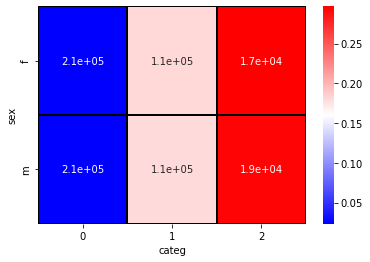

In [5]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df_final)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1], cmap='bwr', linecolor='k', linewidths=2)
plt.show()

##### Interprétations
- les femmes préfèrent respectivement les catégories : 0, 1 et 2 en dernier.
- les hommes ont les mêmes préferences que les femmes concernant les catégories.

<div class="alert-info"
     style="margin: auto;  
            font-family:Helvetica, Arial, verdana, sans-serif"> La préférence pour une catégorie de livre chez les femmes évolue de la même manière que celle chez les hommes </div>


<strong> Situation : </strong> varibale qualitative vs variable qualitative <br>
<strong> Outils :</strong> Test du Khi-deux <br> 
<strong> Prérequis khi-deux : </strong> au moins 5 éléments par cases.<br> 
<strong> Outils test de significativité :</strong> V Cramer<br> 
<strong> Rejet de H0 : </strong>  𝜒𝑐𝑎𝑙𝑐𝑢𝑙é2 > 𝜒𝑡ℎé𝑜𝑟𝑖𝑞𝑢𝑒2 | 𝑝𝑉𝑎𝑙𝑒𝑢𝑟 < 𝛼 </div>

In [6]:
# Test d'indépendance du hi-deux :
print("="*100)
print("Test d'indépendance entre le genre et la catégorie (Test du khi-deux)")
print("\t Hypoyhèse nulle H0 : \t \t La préférence pour une catégorie de livre ne dépend pas du sexe du client.")
print("\t Hypoyhèse alternative H1 : \t La préférence pour une catégorie dépend du sexe du client.")
print('')

# On calcule le chi2, la pvalue, le ta
conti = df_final[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy()
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(conti)
print("Le khi-deux est de : ",st_chi2,"\n")
print("La p-value est de :",st_p,"\n")


if st_p < 0.05:
    print("L'hypothèse nulle est rejetée \t ==> H1: La préférence pour une catégorie dépend du sexe du client.")
else:
    print("On ne peut pas rejeter l'hypothèse nulle H0 (La préférence pour une catégorie de livre ne dépend pas du sexe du client)")

    # Coefficient de Cramer
import researchpy
crosstab, res = researchpy.crosstab(df_final['sex'], df_final['categ'], test='chi-square')
print("="*100,"\n")
print("Test de significativité (Coefficient V de Cramer)")
print("Le degré de liberté pour le coefficient de cramer est de:",min(conti.shape[0], conti.shape[1]) - 1)
print("Le coefficient de Cramer est de :", res.iloc[2,1])
print("="*100,"\n")

Test d'indépendance entre le genre et la catégorie (Test du khi-deux)
	 Hypoyhèse nulle H0 : 	 	 La préférence pour une catégorie de livre ne dépend pas du sexe du client.
	 Hypoyhèse alternative H1 : 	 La préférence pour une catégorie dépend du sexe du client.

Le khi-deux est de :  147.00253568681114 

La p-value est de : 1.1989607410166063e-32 

L'hypothèse nulle est rejetée 	 ==> H1: La préférence pour une catégorie dépend du sexe du client.

Test de significativité (Coefficient V de Cramer)
Le degré de liberté pour le coefficient de cramer est de: 1
Le coefficient de Cramer est de : 0.0147



<div class="alert-info"
     style="margin: auto;  
            font-family:Helvetica, Arial, verdana, sans-serif">
<strong> Pour α = 5% : Le sexe des clients a une dépendance sur la catégorie des livres achetés. 

Cependant, le coefficient de Cramer est trop proche de 0, cette corrélation n'est donc pas significative. </strong> </div>

<h2  style= "background-color: #d4bdcf;
                 color: white;
            text-align: center; 
            font-family:Helvetica, Arial, verdana, sans-serif">  Analyse des comportements clients en fonction de l'age</h2>

In [7]:
# On calcule les variables frequence achat, panier moyen et montant achats (Tous les clients).
age_client = df_final.groupby(["age_client", "tranche_age",]).agg({"id_prod":"count","price":"sum"}).reset_index()
age_client.rename(columns={"price":"montant_achats", "id_prod":"frequence_achat"}, inplace=True)
age_client["panier_moyen"] = age_client["montant_achats"]/ age_client["frequence_achat"]
print("All clients")
display(age_client.head())

# On calcule les variables frequence achat, panier moyen et montant achats pour les clients particuliers
age_client_B2C = df_final[df_final["Type_client"]=="particulier"].groupby(["age_client", "tranche_age"]).agg({"id_prod":"count","price":"sum"}).reset_index()
age_client_B2C.rename(columns={"price":"montant_achats", "id_prod":"frequence_achat"}, inplace=True)
age_client_B2C["panier_moyen"] = age_client_B2C["montant_achats"]/ age_client_B2C["frequence_achat"]
print("B2C clients")
display(age_client_B2C.head())

All clients


,age_client,tranche_age,frequence_achat,montant_achats,panier_moyen
0,18,16 - 25 ans,15149,609013.69,40.201577
1,19,16 - 25 ans,4371,178195.78,40.767737
2,20,16 - 25 ans,4587,184209.27,40.158986
3,21,16 - 25 ans,4252,178497.70,41.979704
4,22,16 - 25 ans,4415,165029.26,37.379221


B2C clients


,age_client,tranche_age,frequence_achat,montant_achats,panier_moyen
0,18,16 - 25 ans,15149,609013.69,40.201577
1,19,16 - 25 ans,4371,178195.78,40.767737
2,20,16 - 25 ans,4587,184209.27,40.158986
3,21,16 - 25 ans,4252,178497.70,41.979704
4,22,16 - 25 ans,4415,165029.26,37.379221



All clients


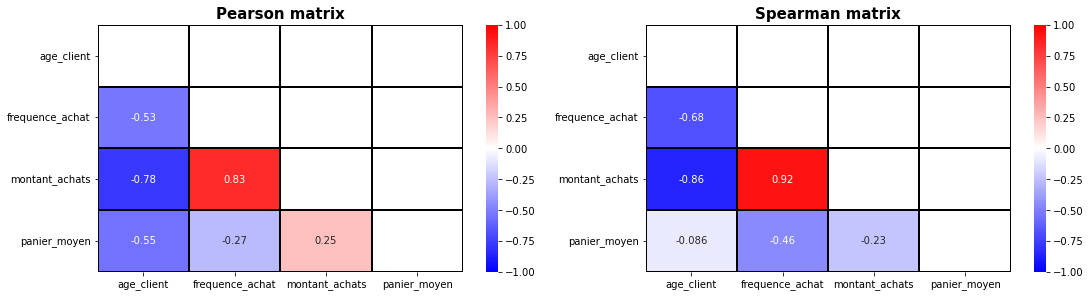


B2C clients


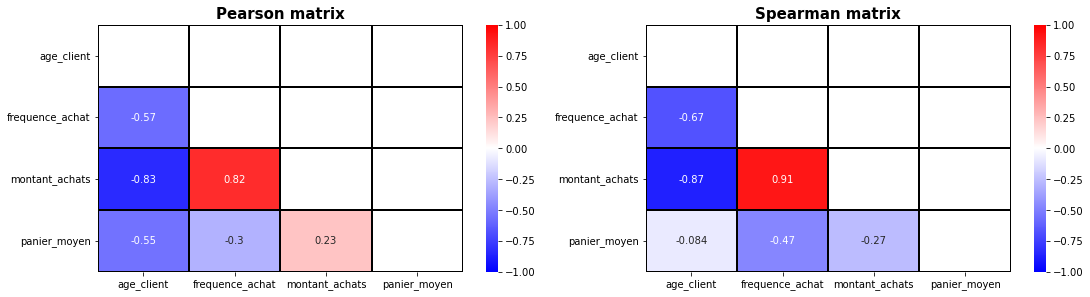

In [8]:
print("="*100,"\n")
print("All clients")
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
mask = np.triu(np.ones_like(age_client.corr(), dtype=bool))
sns.heatmap(age_client.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='bwr', linecolor='k', linewidths=2)
plt.title('Pearson matrix', fontsize = 15, fontweight='bold')
# age vs frequence achat
plt.subplot(2,2,2)
mask = np.triu(np.ones_like(age_client.corr(), dtype=bool))
sns.heatmap(age_client.corr(method="spearman"), mask=mask, vmin=-1, vmax=1, annot=True, cmap='bwr', linecolor='k', linewidths=2)
plt.title('Spearman matrix', fontsize = 15, fontweight='bold')
plt.show()
print("="*100,"\n")
print("B2C clients")
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
mask = np.triu(np.ones_like(age_client_B2C.corr(), dtype=bool))
sns.heatmap(age_client_B2C.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='bwr', linecolor='k', linewidths=2)
plt.title('Pearson matrix', fontsize = 15, fontweight='bold')
# age vs frequence achat
plt.subplot(2,2,2)
mask = np.triu(np.ones_like(age_client_B2C.corr(), dtype=bool))
sns.heatmap(age_client_B2C.corr(method="spearman"), mask=mask, vmin=-1, vmax=1, annot=True, cmap='bwr', linecolor='k', linewidths=2)
plt.title('Spearman matrix', fontsize = 15, fontweight='bold')
plt.show()

<h2 style="margin: auto; 
            text-align: center; 
            font-family:Helvetica, Arial, verdana, sans-serif"><a name="C3">Age vs Fréquence achat</a></h2> 

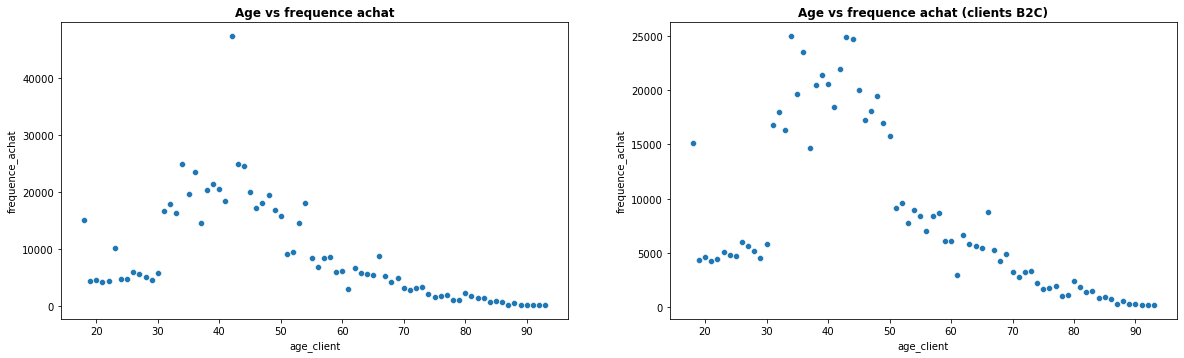

In [9]:
# age vs frequence achat
#age_client["clusters_1"]= pd.cut(age_client["age_client"], bins=[15,42,100], labels=["Moins de 35 ans","Plus de 35 ans"])
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
sns.scatterplot(data=age_client, x= "age_client",y = "frequence_achat")
plt.title("Age vs frequence achat",fontsize = 12, fontweight='bold')

plt.subplot(2,2,2)
sns.scatterplot(data=age_client_B2C, x= "age_client",y = "frequence_achat")
plt.title("Age vs frequence achat (clients B2C)",fontsize = 12, fontweight='bold')
plt.show()

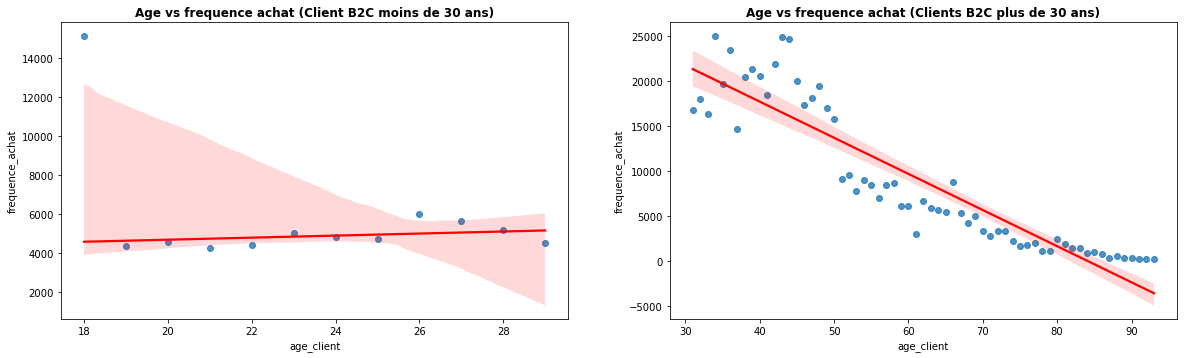

In [10]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
line_kws = {'color' : 'r',}
#slope, intercept, r_value, p_value, std_err = stats.linregress(age_client['age_client'],age_client["frequence_achat"])
sns.regplot(data=age_client_B2C[age_client_B2C["age_client"] < 30], x= "age_client",y = "frequence_achat", line_kws =line_kws, robust=True)
plt.title("Age vs frequence achat (Client B2C moins de 30 ans)",fontsize = 12, fontweight='bold')
#plt.title('Age vs frequence achat : y={0:.3f}x+{1:.1f}'.format(slope,intercept), fontsize = 12, fontweight='bold')

plt.subplot(2,2,2)
#slope, intercept, r_value, p_value, std_err = st.linregress(age_client['age_client'],age_client["frequence_achat"])
sns.regplot(data=age_client_B2C[age_client_B2C["age_client"] > 30], x= "age_client",y = "frequence_achat", line_kws =line_kws )
plt.title("Age vs frequence achat (Clients B2C plus de 30 ans)",fontsize = 12, fontweight='bold')
#plt.title('Age vs frequence achat : y={0:.3f}x+{1:.1f}'.format(slope,intercept), fontsize = 12, fontweight='bold')
plt.show()

<strong>Interprétations </strong>

On observe <strong> une relation linéaire légèrement positive de 18 à 30 ans </strong> puis <strong> négative à partir de 30ans. </strong>.
La relation est plus étalée et plus dense du coté négatif.

<div class="alert-info"
     style="margin: auto;  
            font-family:Helvetica, Arial, verdana, sans-serif"> D'un point de vue général, la fréquence d'achat diminue avec l'age.</div> <br>
<div class="alert-warning"
     style="margin: auto;  
            font-family:Helvetica, Arial, verdana, sans-serif"> La fréquence d'achat au niveau des 18 ans est très élévée.</div> <br>

<strong> Situation : </strong> varibale qualitative vs variable qualitative <br>
<strong> Outils :</strong> Pearson, Spearman, Kendall et Student<br> 
<strong> Prérequis Pearson : </strong> distriutions normales et lien linéaire <br> 
<strong> Prérequis Spearman : </strong>  liason monotone (robuste aux outliers, fonctionne sur les distributions non linéaires) <br>
<strong> Outils test de significativité:</strong> Student, pvalue<br> 
<strong> Prérequis Student : </strong> distriutions normales et égalités des variances<br> 
<strong> Rejet de H0 : </strong> 𝑝𝑉𝑎𝑙𝑒𝑢𝑟 < 𝛼 </div>

In [11]:
# Test de normalité age_client et frequence achat (Test de shapiro):
shapiro_test(age_client_B2C["frequence_achat"])
shapiro_test(age_client_B2C["age_client"])


Test de normalité age_client (Test de shapiro)
L'hypothèse nulle est rejetée 	 ==> La variable ne suit pas une loi normale



Test de normalité age_client (Test de shapiro)
L'hypothèse nulle est rejetée 	 ==> La variable ne suit pas une loi normale




<div class="alert-warning"
     style="margin: auto;  
            font-family:Helvetica, Arial, verdana, sans-serif"> La fréquence d'achat et l'age des clients ne suivent pas de loi normale.</div> <br>

In [12]:
# Test de corrélation (Test de Spearman):
spearman_test(age_client_B2C["age_client"],age_client_B2C["frequence_achat"])


Test d'indépendance (Test de Spearman)

Spearman coeff = -0.6738482570061518
Spearman pvalue = 2.5391854434818517e-11

Les variables présentent significativement une forte corrélation négative.


<div class="alert-info"
     style="margin: auto;  
            font-family:Helvetica, Arial, verdana, sans-serif">
L'age et la fréquence d'achat des clients sont négativement corrélés, ce qui veut dire dans notre cas : <strong> D'un point de vue général, plus le client est agé et moins fréquement il achète. </strong> </div>.

<h2 style="margin: auto; 
            text-align: center; 
            font-family:Helvetica, Arial, verdana, sans-serif"><a name="C4">Age vs Montant total des achats</a></h2> 

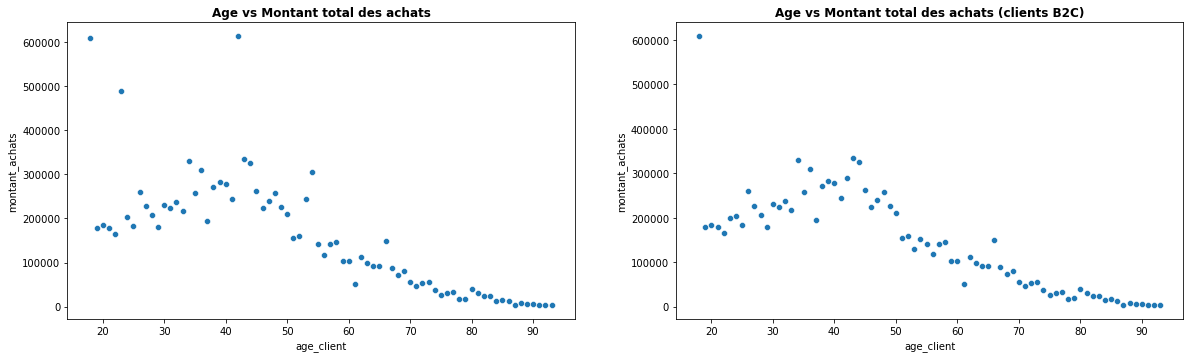

In [13]:

#age_client["clusters_1"]= pd.cut(age_client["age_client"], bins=[15,42,100], labels=["Moins de 35 ans","Plus de 35 ans"])
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
sns.scatterplot(data=age_client, x= "age_client",y = "montant_achats")
plt.title("Age vs Montant total des achats",fontsize = 12, fontweight='bold')

plt.subplot(2,2,2)
sns.scatterplot(data=age_client_B2C, x= "age_client",y = "montant_achats")
plt.title("Age vs Montant total des achats (clients B2C)",fontsize = 12, fontweight='bold')
plt.show()

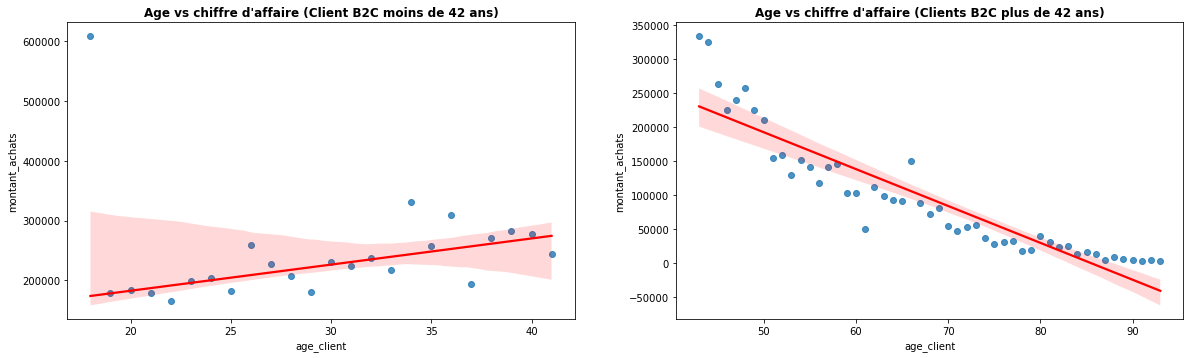

In [14]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
line_kws = {'color' : 'r',}
#slope, intercept, r_value, p_value, std_err = stats.linregress(age_client['age_client'],age_client["frequence_achat"])
sns.regplot(data=age_client_B2C[age_client_B2C["age_client"] < 42], x= "age_client",y = "montant_achats", line_kws =line_kws, robust=True)
plt.title("Age vs chiffre d'affaire (Client B2C moins de 42 ans)",fontsize = 12, fontweight='bold')
#plt.title('Age vs frequence achat : y={0:.3f}x+{1:.1f}'.format(slope,intercept), fontsize = 12, fontweight='bold')

plt.subplot(2,2,2)
#slope, intercept, r_value, p_value, std_err = st.linregress(age_client['age_client'],age_client["frequence_achat"])
sns.regplot(data=age_client_B2C[age_client_B2C["age_client"] > 42], x= "age_client",y = "montant_achats", line_kws =line_kws )
plt.title("Age vs chiffre d'affaire (Clients B2C plus de 42 ans)",fontsize = 12, fontweight='bold')
#plt.title('Age vs frequence achat : y={0:.3f}x+{1:.1f}'.format(slope,intercept), fontsize = 12, fontweight='bold')
plt.show()


<strong>Interprétations </strong>

On observe <strong> une relation linéaire positive de 18 à 42 ans </strong> puis <strong> négative à partir de 42ans. </strong>. La distribution est beaucoup plus dense et plus étalée à droite.

- Le montant total des achats augmente avec l'âge jusqu'à 42ans et diminue à partir dde 42 ans. 

- Les 18 ans présentent un chiffre d'affaire très élévé.

<strong> Situation : </strong> varibale qualitative vs variable qualitative <br>
<strong> Outils :</strong> Person, Spearman ou Kendall<br> 
<strong> Prérequis Pearson : </strong> distriution normale et lien linéaire <br> 
<strong> Prérequis Spearman : </strong>  liason monotone (robuste aux outliers, fonctionne sur les distributions non linéaires) <br>
<strong> Rejet de H0 : </strong> 𝑝𝑉𝑎𝑙𝑒𝑢𝑟 < 𝛼 </div>
<br>

<p><strong> Quelques hypothèses</strong></p>
<ul>
<li> Il y a un âge minimum requis pour acheter sur le site et des acheteurs qui trichent sur leur âge (juste le minimum)</li>
<li> Des étudiants pratiquent des achats saisoniers (rentrées scolaires) et les sont souvent assez elevés.</li></ul>

In [15]:
# Test de normalité montant des achats (Test de shapiro):
shapiro_test(age_client_B2C["montant_achats"])


Test de normalité age_client (Test de shapiro)
L'hypothèse nulle est rejetée 	 ==> La variable ne suit pas une loi normale




<div class="alert-warning"
     style="margin: auto;  
            font-family:Helvetica, Arial, verdana, sans-serif"> Le montant total des achats ne suit pas de loi normale => Test de spearman.</div> <br>

In [16]:
# Test de corrélation (Test de Spearman):
spearman_test(age_client_B2C["age_client"],age_client_B2C["montant_achats"])


Test d'indépendance (Test de Spearman)

Spearman coeff = -0.8736842105263158
Spearman pvalue = 7.352708223159905e-25

Les variables présentent significativement une très forte corrélation négative.


<div class="alert-info"
     style="margin: auto;  
            font-family:Helvetica, Arial, verdana, sans-serif">
L'age et la fréquence d'achat des clients sont négativement corrélés, ce qui veut dire dans notre cas : <strong> D'un point de vue général, plus le client est agé moins il achète. </strong> </div>.

<h2 style="margin: auto; 
            text-align: center; 
            font-family:Helvetica, Arial, verdana, sans-serif"><a name="C5">Age vs Panier moyen</a></h2> 

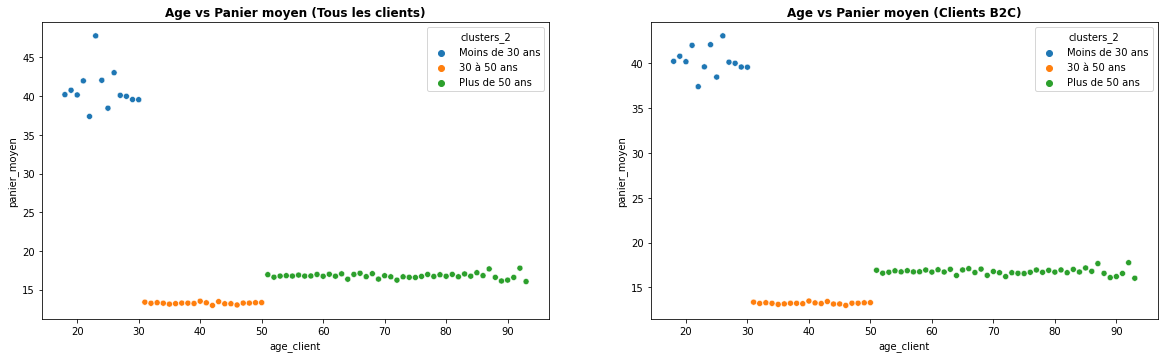

In [17]:
#age_client["clusters_1"]= pd.cut(age_client["age_client"], bins=[15,42,100], labels=["Moins de 35 ans","Plus de 35 ans"])
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
age_client["clusters_2"]= pd.cut(age_client["age_client"], bins=[15,30,50,100], labels=["Moins de 30 ans","30 à 50 ans","Plus de 50 ans"])
sns.scatterplot(data=age_client, x="age_client", y="panier_moyen", hue="clusters_2")
plt.title("Age vs Panier moyen (Tous les clients)",fontsize = 12, fontweight='bold')

plt.subplot(2,2,2)
age_client_B2C["clusters_2"]= pd.cut(age_client_B2C["age_client"], bins=[15,30,50,100], labels=["Moins de 30 ans","30 à 50 ans","Plus de 50 ans"])
sns.scatterplot(data=age_client_B2C, x="age_client", y="panier_moyen", hue="clusters_2")
plt.title("Age vs Panier moyen (Clients B2C)",fontsize = 12, fontweight='bold')

plt.show()

#####  Observations:

- Les moins de 30 ans : panier moyen élévé, plus de 35 euros
- Les 30 - 50 ans : panier moyen faible, moins de 15 euros
- Les plus de 50 ans : panier moyen compris entre 15 et 20 euros

In [18]:
# Test de normalité montant des achats (Test de shapiro):
shapiro_test(age_client["panier_moyen"])


Test de normalité age_client (Test de shapiro)
L'hypothèse nulle est rejetée 	 ==> La variable ne suit pas une loi normale




<div class="alert-warning"
     style="margin: auto;  
            font-family:Helvetica, Arial, verdana, sans-serif"> Le panier moyen ne suit pas de loi normale => Test de spearman.</div> <br>

In [19]:
# Test de corrélation (Test de Spearman):
spearman_test(age_client_B2C["age_client"],age_client_B2C["panier_moyen"])


Test d'indépendance (Test de Spearman)

Spearman coeff = -0.08440191387559809
Spearman pvalue = 0.46851387450200865

Les variables présentent une corrélation négative négligeable (ou nulle) peu significative


<div class="alert-info"
     style="margin: auto;  
            font-family:Helvetica, Arial, verdana, sans-serif">
L'age et le panier moyen sont négativement corrélés. Cependant, cette relation n'est pas représentative.

<h2 style="margin: auto; 
            text-align: center; 
            font-family:Helvetica, Arial, verdana, sans-serif"><a name="C6">Age vs Catégorie des livres achetés</a></h2> 

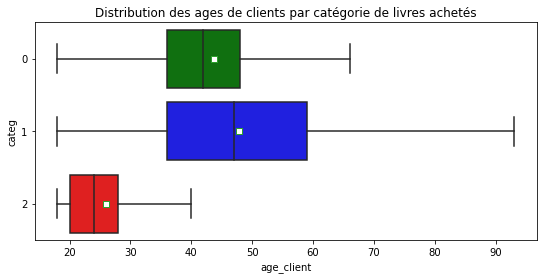

In [20]:
plt.figure(figsize=(9,4))
palette = ['g','b','r']
meanprops={ "marker" : "s", "markerfacecolor" : "w"}
sns.boxplot(data=B2C, y='categ', x='age_client', orient='h', showfliers=False, showmeans=True, palette=palette, meanprops=meanprops)
plt.title('Distribution des ages de clients par catégorie de livres achetés');

<li><strong> Catégorie 0 : </strong> Clients de 18 à 65 ans avec un age moyen de 45ans (approximatif)</li>
<li><strong> Catégorie 1 : </strong> Tout public avec un age moyen de 48ans (approximatif)</li>
<li><strong> Catégorie 2 : </strong> Clients de 18 à 40 ans avec un age moyen de 27 ans (approximatif)</li>

In [21]:
#Test Anova
import pingouin as pg
aov = pg.anova(dv='age_client', between='categ', data=df_final, detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,categ,1.489749e+07,2,7.448743e+06,45883.780589,0.0,0.119009
1,Within,1.102818e+08,679329,1.623393e+02,NaN,NaN,NaN


In [22]:
sample = B2C.sample(10000)
# Test ANOVA
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols


sample = B2C.sample(10000)
model = smf.ols('age_client ~ categ', data=sample).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('Test ANOVA entre Age et catégories (catégories 0 et 1)')
print("\t Hypoyhèse nulle H0 : \t \t Pas d'effet d'age sur les catégories (mêmes moyennes).")
print("\t Hypoyhèse alternative H1 : \t Au moins une catégorie a une moyenne d'age significativement différente.")
print('')
print('Table ANOVA :')
display(anova_table)

Test ANOVA entre Age et catégories (catégories 0 et 1)
	 Hypoyhèse nulle H0 : 	 	 Pas d'effet d'age sur les catégories (mêmes moyennes).
	 Hypoyhèse alternative H1 : 	 Au moins une catégorie a une moyenne d'age significativement différente.

Table ANOVA :


,sum_sq,df,F,PR(>F)
categ,1.043392e+04,1.0,53.421532,2.897295e-13
Residual,1.952739e+06,9998.0,NaN,NaN


In [23]:
p_value = anova_table['PR(>F)'][0]
print('p-value :', p_value)

if p_value < 0.05:
    print("L'hypothèse nulle est rejetée \t ==> H1: Au moins une catégorie a une moyenne d'age significativement différente.")
else:
    print("On ne peut pas rejeter l'hypothèse nulle H0 (Pas d'effet d'age sur les catégories).")

p-value : 2.897295135725548e-13
L'hypothèse nulle est rejetée 	 ==> H1: Au moins une catégorie a une moyenne d'age significativement différente.


<div class="alert-info"
     style="margin: auto;  
            font-family:Helvetica, Arial, verdana, sans-serif">
Les moyennes d'age des catégories sont significativement différentes.</div>.